In [1]:
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 20

matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.color'] = '0.5'
matplotlib.rcParams['grid.linewidth'] = '0.5'

matplotlib.rcParams['axes.edgecolor'] = '0.25'
matplotlib.rcParams['xtick.color'] = '0'
matplotlib.rcParams['ytick.color'] = '0'

matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 10
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False


matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.weight']='ultralight'
# matplotlib.rcParams['font.sans-serif'] = ['Computer Modern Sans Serif']

In [100]:
matplotlib.rcParams['axes.axisbelow'] = True

In [4]:
import glob
from matplotlib import pyplot as plt
import numpy as np
from Bio import SeqIO
from scipy import stats
import re
import random
import pandas as pd
import json

from Bio.Data import CodonTable

import itertools

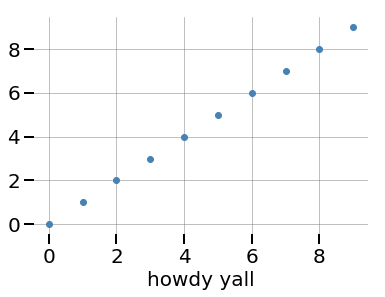

In [5]:
plt.figure()
plt.plot(list(range(10)), list(range(10)), color='steelblue', linestyle='', marker='o')
plt.xlabel('howdy yall')

In [6]:
def get_codon_dicts(n=11):
    GivenCodonTable = CodonTable.unambiguous_dna_by_id[n]
    nucleotides = ['A', 'T', 'C', 'G']
    aa_to_codons = {}
    for first in nucleotides:
        for second in nucleotides:
            for third in nucleotides:
                Codon = first + second + third
                if Codon not in CodonTable.unambiguous_dna_by_id[n].stop_codons:
                    if GivenCodonTable.forward_table[Codon] in aa_to_codons.keys():
                            aa_to_codons[GivenCodonTable.forward_table[Codon]].append(Codon)
                    else:
                        aa_to_codons[GivenCodonTable.forward_table[Codon]] = [Codon]
                else:
                    pass
    codon_to_aa = {}
    for aa, syns in aa_to_codons.items():
        for syn in syns:
            codon_to_aa[syn] = aa
    return aa_to_codons, codon_to_aa

aa_to_codon_dict, codon_to_aa_dict = get_codon_dicts()
redundant_codon_extension = ['CTA', 'CTG', 'CTC', 'CTT',\
                             'TCA', 'TCG', 'TCC', 'TCT',\
                             'CGA', 'CGG', 'CGC', 'CGT']

# Get the sequences for each gene for testing purposes later
Note: this requires establishing a reference genome that you will use later

In [7]:
base_genome = '511145.12' #This is E. coli K12
seq_dicty = {}
# for infile_name in glob.glob('../Data/Orthologs/Order_Enterobacterales_Reference/mfastas_nt/*.mfasta'):
for infile_name in glob.glob('../Data/Orthologs/Order_Enterobacterales_Representative/mfastas_nt/*.mfasta'):
#     print(infile_name)
    gene_name = infile_name.split('/')[-1].strip('.mfasta')
    records = list(SeqIO.parse(infile_name, 'fasta'))
    for record in records:
        try:
            seq_dicty[record.id][gene_name] = str(record.seq)
        except KeyError:
            seq_dicty[record.id] = {}
            seq_dicty[record.id][gene_name] = str(record.seq)

# Read in conservation data as separate dictionaries

In [21]:
dicty_phylop = {}
# for infile_name in glob.glob('../Results/Order_Enterobacterales_Reference/phyloP/*.wig')[:]:
# for infile_name in glob.glob('../Results/Order_Enterobacterales_Representative/phyloP/*.wig')[:]:
for infile_name in glob.glob('../Results/Order_Enterobacterales_Representative/phyloP_CONACC/*.wig')[:]:
    with open(infile_name, 'r') as infile:
        tempy = infile.readlines()
        data = [float(i) for i in tempy[1:]]
        dicty_phylop[infile_name.split('/')[-1].strip('.wig')] = data
print(len(dicty_phylop.keys()))

1449


In [22]:
dicty_phylopGERP = {}
# for infile_name in glob.glob('../Results/Order_Enterobacterales_Reference/phyloP_GERP/*.wig')[:]:
for infile_name in glob.glob('../Results/Order_Enterobacterales_Representative/phyloP_GERP/*.wig')[:]:
    with open(infile_name, 'r') as infile:
        tempy = infile.readlines()
        data = [float(i) for i in tempy[1:]]
        dicty_phylopGERP[infile_name.split('/')[-1].strip('.wig')] = data
print(len(dicty_phylopGERP.keys()))

1449


In [23]:
dicty_phastCons = {}
# for infile_name in glob.glob('../Results/Order_Enterobacterales_Reference/phastCons/*.wig')[:]:
for infile_name in glob.glob('../Results/Order_Enterobacterales_Representative/phastCons/*.wig')[:]:
    with open(infile_name, 'r') as infile:
        tempy = infile.readlines()
        data = [float(i) for i in tempy[1:]]
        dicty_phastCons[infile_name.split('/')[-1].strip('.wig')] = data
print(len(dicty_phastCons.keys()))

1449


# Trim 5' terminal gaps in E. coli

In [24]:
print(np.mean([len(i) for i in seq_dicty[base_genome].values()]))
print(np.mean([len(i) for i in dicty_phylop.values()]))

for i, j in seq_dicty[base_genome].items():
    if j[0:3] == '---':
        first_bases = []
        for base in ['A', 'T', 'G', 'C']:
            first_bases.append(j.find(base))
        first_base = min(first_bases)
        seq_dicty[base_genome][i] = j[first_base:]
        dicty_phylop[i] = dicty_phylop[i][first_base:]
print(np.mean([len(i) for i in seq_dicty[base_genome].values()]))
print(np.mean([len(i) for i in dicty_phylop.values()]))




1108.46169772
1108.55486542
1057.53416149
1057.62732919


In [ ]:
# print(np.mean([len(i) for i in seq_dicty[base_genome].values()]))
# print(np.mean([len(i) for i in dicty_phylop.values()]))

# for genome in seq_dicty.keys():
#     longest = []
#     for i, j in seq_dicty[genome].items():
#         if j[0:3] == '---':
#             first_bases = []
#             for base in ['A', 'T', 'G', 'C']:
#                 first_bases.append(j.find(base))
#             first_base = min(first_bases)
#             longest.append(first_base)
#     strict_first = max(longest)
#     seq_dicty[base_genome][i] = j[strict_first:]
#     dicty_phylop[i] = dicty_phylop[i][strict_first:]
    
# print(np.mean([len(i) for i in seq_dicty[base_genome].values()]))
# print(np.mean([len(i) for i in dicty_phylop.values()]))

# Investigate relationships between the metrics on the full dataset

In [48]:
phylop = []
phylopGERP = []
phastCons = []
for key, val in dicty_phylop.items():
    phylop.extend(dicty_phylop[key])    
    phylopGERP.extend(dicty_phylopGERP[key])
    phastCons.extend(dicty_phastCons[key])

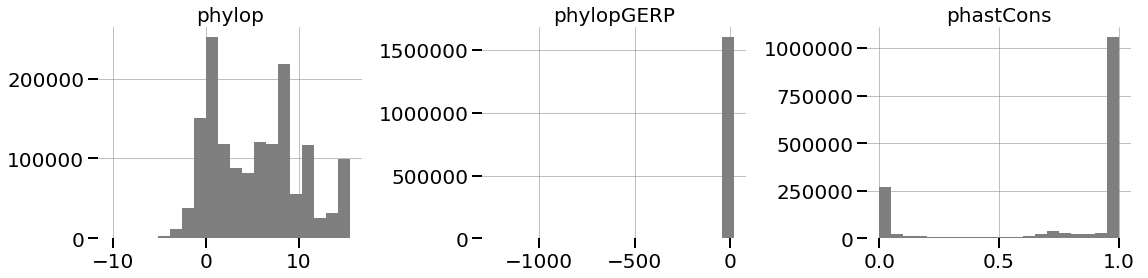

In [49]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(131)
ax1.hist(phylop, 20, color='k', alpha=0.5)
ax1.set_title('phylop')
ax2 = fig.add_subplot(132)
ax2.hist(phylopGERP, 20, color='k', alpha=0.5)
ax2.set_title('phylopGERP')
ax3 = fig.add_subplot(133)
ax3.hist(phastCons, 20, color='k', alpha=0.5)
ax3.set_title('phastCons')
plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(131)
ax1.semilogy(phylop, phylopGERP, 'ko', alpha=0.01)
ax1.set_xlabel('phylop', fontsize=20)
ax1.set_ylabel('phylopGERP', fontsize=20)
ax2 = fig.add_subplot(132)
ax2.plot(phylop, phastCons, 'ko', alpha=0.01)
ax2.set_xlabel('phylop', fontsize=20)
ax2.set_ylabel('phastCons', fontsize=20)
ax3 = fig.add_subplot(133)
ax3.semilogy(phastCons, phylopGERP, 'ko', alpha=0.01)
ax3.set_xlabel('phastCons', fontsize=20)
ax3.set_ylabel('phylopGERP', fontsize=20)
plt.tight_layout()

print(len(phylop), len(phylopGERP), len(phastCons))
print(stats.spearmanr(phylop, phylopGERP))
print(stats.spearmanr(phylop, phastCons))
print(stats.spearmanr(phastCons, phylopGERP))

# Repeat above averaging over genes

In [25]:
phylop = []
phylopGERP = []
phastCons = []
for key, val in dicty_phylop.items():
    phylop.append(np.mean(dicty_phylop[key]))    
    phylopGERP.append(np.mean(dicty_phylopGERP[key]))
    phastCons.append(np.mean(dicty_phastCons[key]))

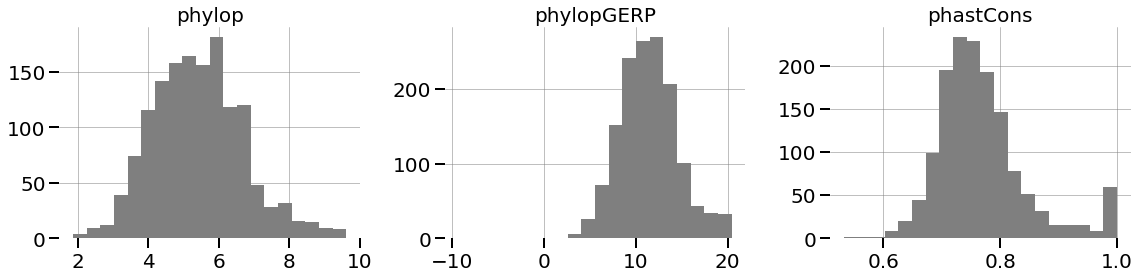

In [26]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(131)
ax1.hist(phylop, 20, color='k', alpha=0.5)
ax1.set_title('phylop')
ax2 = fig.add_subplot(132)
ax2.hist(phylopGERP, 20, color='k', alpha=0.5)
ax2.set_title('phylopGERP')
ax3 = fig.add_subplot(133)
ax3.hist(phastCons, 20, color='k', alpha=0.5)
ax3.set_title('phastCons')
plt.tight_layout()

1449 1449 1449
SpearmanrResult(correlation=0.93862166391153279, pvalue=0.0)
SpearmanrResult(correlation=0.78395185581238447, pvalue=7.0821279924688366e-302)
SpearmanrResult(correlation=0.81072959978306935, pvalue=0.0)


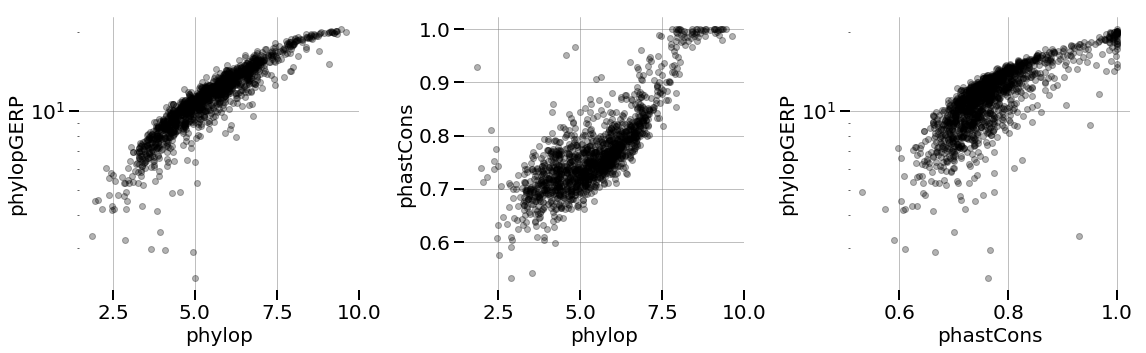

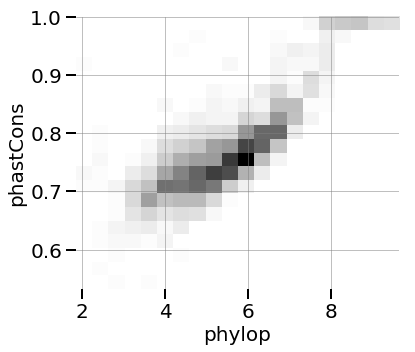

In [27]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(131)
ax1.semilogy(phylop, phylopGERP, 'ko', alpha=0.3)
ax1.set_xlabel('phylop')
ax1.set_ylabel('phylopGERP')
ax2 = fig.add_subplot(132)
ax2.plot(phylop, phastCons, 'ko', alpha=0.3)
ax2.set_xlabel('phylop')
ax2.set_ylabel('phastCons')
ax3 = fig.add_subplot(133)
ax3.semilogy(phastCons, phylopGERP, 'ko', alpha=0.3)
ax3.set_xlabel('phastCons')
ax3.set_ylabel('phylopGERP')
plt.tight_layout()

print(len(phylop), len(phylopGERP), len(phastCons))
print(stats.spearmanr(phylop, phylopGERP))
print(stats.spearmanr(phylop, phastCons))
print(stats.spearmanr(phastCons, phylopGERP))

fig = plt.figure(figsize=(16,5))

ax2 = fig.add_subplot(132)
ax2.hist2d(phylop, phastCons, 20, cmap='gray_r')
ax2.set_xlabel('phylop')
ax2.set_ylabel('phastCons')

plt.tight_layout()

# Look at length and position-dependent scores

In [46]:
ivals = []
plot_vals_phylop = []
plot_vals_phylopGERP = []
plot_vals_phastCons = []


for i in range(150):
    tempy_phylop = []
    tempy_phylopGERP = []
    tempy_phastCons = []
    for gene_name, vals in dicty_phylop.items():
        if len(vals) > 150:
            tempy_phylop.extend([vals[i]])
            tempy_phylopGERP.extend([dicty_phylopGERP[gene_name][i]])
            tempy_phastCons.extend([dicty_phastCons[gene_name][i]])
    plot_vals_phylop.append(np.mean(tempy_phylop))
    plot_vals_phylopGERP.append(np.mean(tempy_phylopGERP))
    plot_vals_phastCons.append(np.mean(tempy_phastCons))
    ivals.append(i)

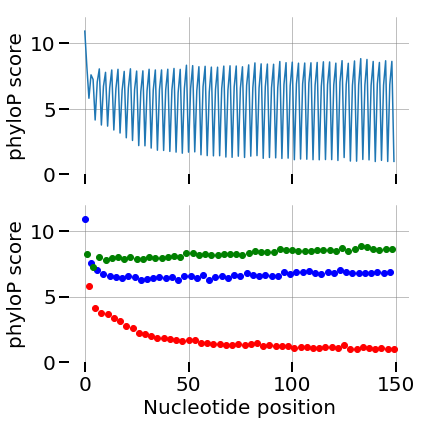

In [47]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(211)
ax1.plot(ivals, plot_vals_phylop)
# ax1.set_title('phylop')
ax1.set_xticklabels([''])
ax1.set_ylabel('phyloP score')
ax1.set_ylim(0,12)
ax2 = fig.add_subplot(212)
ax2.plot(ivals[0::3], plot_vals_phylop[0::3], 'bo')
ax2.plot(ivals[1::3], plot_vals_phylop[1::3], 'go')
ax2.plot(ivals[2::3], plot_vals_phylop[2::3], 'ro')
ax2.set_xlabel('Nucleotide position')
ax2.set_ylabel('phyloP score')
ax2.set_ylim(0, 12)
plt.tight_layout()
plt.savefig('../Results/phylop_position_dependency.png')

# ax3 = fig.add_subplot(232)
# ax3.plot(ivals, plot_vals_phylopGERP)
# ax3.set_title('phylopGERP')
# ax4 = fig.add_subplot(235)
# ax4.plot(ivals[0::3], plot_vals_phylopGERP[0::3], 'b')
# ax4.plot(ivals[1::3], plot_vals_phylopGERP[1::3], 'g')
# ax4.plot(ivals[2::3], plot_vals_phylopGERP[2::3], 'r')

# ax5 = fig.add_subplot(233)
# ax5.plot(ivals, plot_vals_phastCons)
# ax5.set_title('phastCons')
# ax6 = fig.add_subplot(236)
# ax6.plot(ivals[0::3], plot_vals_phastCons[0::3], 'b')
# ax6.plot(ivals[1::3], plot_vals_phastCons[1::3], 'g')
# ax6.plot(ivals[2::3], plot_vals_phastCons[2::3], 'r')

In [32]:
ivals = []
plot_vals_phylop = []
plot_vals_phylopGERP = []
plot_vals_phastCons = []


for i in range(150, 0, -1):
    tempy_phylop = []
    tempy_phylopGERP = []
    tempy_phastCons = []
    for gene_name, vals in dicty_phylop.items():
        if len(vals) > 150:
            tempy_phylop.extend([vals[-i]])
            tempy_phylopGERP.extend([dicty_phylopGERP[gene_name][-i]])
            tempy_phastCons.extend([dicty_phastCons[gene_name][-i]])
    plot_vals_phylop.append(np.mean(tempy_phylop))
    plot_vals_phylopGERP.append(np.mean(tempy_phylopGERP))
    plot_vals_phastCons.append(np.mean(tempy_phastCons))
    ivals.append(-i)

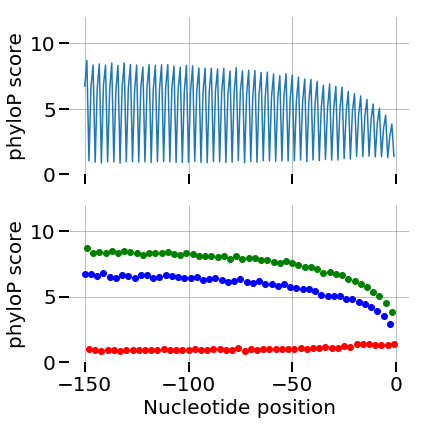

In [33]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(211)
ax1.plot(ivals, plot_vals_phylop)
# ax1.set_title('phylop')
ax1.set_ylabel('phyloP score')
ax1.set_xticklabels([''])
ax1.set_ylim(0, 12)
ax2 = fig.add_subplot(212)
ax2.plot(ivals[0::3], plot_vals_phylop[0::3], 'bo')
ax2.plot(ivals[1::3], plot_vals_phylop[1::3], 'go')
ax2.plot(ivals[2::3], plot_vals_phylop[2::3], 'ro')
ax2.set_xlabel('Nucleotide position')
ax2.set_ylabel('phyloP score')
ax2.set_ylim(0, 12)
plt.tight_layout()
plt.savefig('../Results/phylop_position_dependency_cterminus.png')


# ax3 = fig.add_subplot(232)
# ax3.plot(ivals, plot_vals_phylopGERP)
# ax3.set_title('phylopGERP')
# ax4 = fig.add_subplot(235)
# ax4.plot(ivals[0::3], plot_vals_phylopGERP[0::3], 'b')
# ax4.plot(ivals[1::3], plot_vals_phylopGERP[1::3], 'g')
# ax4.plot(ivals[2::3], plot_vals_phylopGERP[2::3], 'r')

# ax5 = fig.add_subplot(233)
# ax5.plot(ivals, plot_vals_phastCons)
# ax5.set_title('phastCons')
# ax6 = fig.add_subplot(236)
# ax6.plot(ivals[0::3], plot_vals_phastCons[0::3], 'b')
# ax6.plot(ivals[1::3], plot_vals_phastCons[1::3], 'g')
# ax6.plot(ivals[2::3], plot_vals_phastCons[2::3], 'r')

In [ ]:
print('Original Data length: {}, Length minus ---: {}'.format(\
    len(seq_dicty[base_genome]['VBIEscCol129921_2060']), len(seq_dicty[base_genome]['VBIEscCol129921_2060'].replace('-', ''))))
print('Length of data files: {}, {}, {}'.format(\
    len(dicty_phylop['VBIEscCol129921_2060']), len(dicty_phylopGERP['VBIEscCol129921_2060']), len(dicty_phastCons['VBIEscCol129921_2060'])))

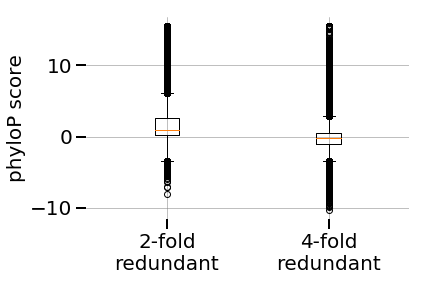

In [62]:
twofold_synon = []
fourfold_synon = []
for i,j in seq_dicty[base_genome].items():
    if len(j) < 150:
        continue
    j_codons = [j[nt:nt+3] for nt in range(0, len(j), 3)]
    for pos, codon in enumerate(j_codons):
        if pos < 50:
            continue
        if codon == '---':
            continue
        if codon_to_aa_dict[codon] in ['P', 'T', 'A', 'V', 'G'] or codon in redundant_codon_extension:
            fourfold_synon.append(dicty_phylop[i][(pos*3)+2])
        elif codon_to_aa_dict[codon] in ['F', 'H', 'Q', 'N', 'K', 'D', 'E']:
            twofold_synon.append(dicty_phylop[i][(pos*3)+2])
            
fig, ax = plt.subplots()
ax.boxplot([twofold_synon, fourfold_synon]);
ax.set_ylabel('phyloP score')
ax.set_xticklabels(['2-fold\nredundant', '4-fold\nredundant'], rotation=0)
plt.tight_layout()
# plt.savefig('../Results/twofold_v_fourfold.png')

# Actually dig into data to test for conservation of individual X-mers
Still trying to decide on the best strategy. My current thinking is to look ONLY at 4-fold redundant codon sites that are within a strong-ish aSD binding site and for each one compare the conservation at that site to the same synonymous codon somewhere else in the same gene. With a list of these, can compare whether there is any conservation difference

In [ ]:
'ACCUCCUUA' #aSD sequence
'UGGAGGAAU' #SD sequence

## Positive control data. Find genes that have another gene directly 3' of them which are thus likely to contain a real SD sequence in their 3' terminus

In [35]:
preceding_genes = []
starts_positive_strand = []
starts_negative_strand = []
genome = list(SeqIO.parse('../../GenomeDatabase/Data/GBFs/511145.12.PATRIC.gbf', 'genbank'))
for record in genome:
    for feature in record.features:
        if feature.type == 'CDS':
            if feature.location.strand == 1:
                starts_positive_strand.append(feature.location.start)
            elif feature.location.strand == -1:
                starts_negative_strand.append(feature.location.end)
for i,j in enumerate(starts_positive_strand):
    starts_positive_strand[i] = list(range(j-20,j+10,1))
for i,j in enumerate(starts_negative_strand):
    starts_negative_strand[i] = list(range(j-10,j+20,1))
for record in genome:
    for feature in record.features:
        if feature.type == 'CDS':
            if feature.location.strand == 1:
                end = feature.location.end
                for i in starts_positive_strand:
                    if end in i:
                        preceding_genes.append(feature.qualifiers['locus_tag'][0])
            elif feature.location.strand == -1:
                end = feature.location.start
                for i in starts_negative_strand:
                    if end in i:
                        preceding_genes.append(feature.qualifiers['locus_tag'][0])

## Also get a list of the highest (or lowest) abundance proteins to segment based on gene expression later

### Tediously first get a dictionary to convert names between RefSeq and PATRIC annotations

In [18]:
genome_ref = list(SeqIO.parse('../../GenomeDatabase/Data/GBFs/511145.12.RefSeq.gbf', 'genbank'))[0]
genome_pat = list(SeqIO.parse('../../GenomeDatabase/Data/GBFs/511145.12.PATRIC.gbf', 'genbank'))[0]

locs_dict_ref_positive = {}
locs_dict_ref_negative = {}

locs_dict_pat_positive = {}
locs_dict_pat_negative = {}

ref_genome_seq_ref_dict = {}
ref_genome_seq_patric_dict = {}

for feature_pat in genome_pat.features[:]:
    if feature_pat.type == 'CDS':
        name_pat = feature_pat.qualifiers['locus_tag'][0]
        strand_pat = feature_pat.strand
        if strand_pat == 1:
            locs_dict_pat_positive[name_pat] = list(range(feature_pat.location.start, feature_pat.location.end))
            ref_genome_seq_patric_dict[name_pat] = genome_pat.seq[feature_pat.location.start:feature_pat.location.end]
        elif strand_pat == -1:
            locs_dict_pat_negative[name_pat] = list(range(feature_pat.location.start, feature_pat.location.end))
            ref_genome_seq_patric_dict[name_pat] = genome_pat.seq[feature_pat.location.start:feature_pat.location.end].reverse_complement()

for feature_ref in genome_ref.features[:]:
    if feature_ref.type == 'CDS':
        name_ref = feature_ref.qualifiers['locus_tag'][0]
        strand_ref = feature_ref.strand
        if strand_ref == 1:
            locs_dict_ref_positive[name_ref] = list(range(feature_ref.location.start, feature_ref.location.end))
            ref_genome_seq_ref_dict[name_ref] = genome_ref.seq[feature_ref.location.start:feature_ref.location.end]

        elif strand_ref == -1:
            locs_dict_ref_negative[name_ref] = list(range(feature_ref.location.start, feature_ref.location.end))
            ref_genome_seq_ref_dict[name_ref] = genome_ref.seq[feature_ref.location.start:feature_ref.location.end].reverse_complement()
            
print(len(locs_dict_pat_positive.keys()))
print(len(locs_dict_pat_negative.keys()))
print(len(locs_dict_ref_positive.keys()))
print(len(locs_dict_ref_negative.keys()))   

reference_name_dict = {}
for name_pat, loc_pat in sorted(locs_dict_pat_positive.items()):
    for name_ref, loc_ref in sorted(locs_dict_ref_positive.items()):
        if len(set(loc_pat)&set(loc_ref)) / len(loc_pat) > 0.9:
            reference_name_dict[name_ref] = name_pat
            del locs_dict_ref_positive[name_ref]
            break
            
for name_pat, loc_pat in sorted(locs_dict_pat_negative.items()):
    for name_ref, loc_ref in sorted(locs_dict_ref_negative.items()):
        if len(set(loc_pat)&set(loc_ref)) / len(loc_pat) > 0.9:
            reference_name_dict[name_ref] = name_pat
            del locs_dict_ref_negative[name_ref]
            break
print(len(reference_name_dict.keys()), len(ref_genome_seq_patric_dict.keys()), len(ref_genome_seq_ref_dict.keys()))

2246
2303
2108
2213
4139 4549 4321


In [19]:
df = pd.read_csv('/Users/adamhockenberry/Downloads/511145/511145-WHOLE_ORGANISM-integrated.txt',\
                 index_col = 'string_external_id', sep='\t', skiprows=10)
expression_dict = {}
for index in df.index:
    temp_name = index.split('.')[-1]
    try:
        expression_dict[reference_name_dict[temp_name]] = df.loc[index]['abundance']
    except KeyError:
        pass

exp_threshold = np.percentile(list(expression_dict.values()), 90) #TUNABLE PARAMETER
expression_subset = []
for i,j in expression_dict.items():
    if j > exp_threshold:
        expression_subset.append(i)
print('Number of genes in the expression subset is {}'.format(len(expression_subset)))

Number of genes in the expression subset is 401


SpearmanrResult(correlation=0.54373977739933532, pvalue=1.1728991706518018e-111)


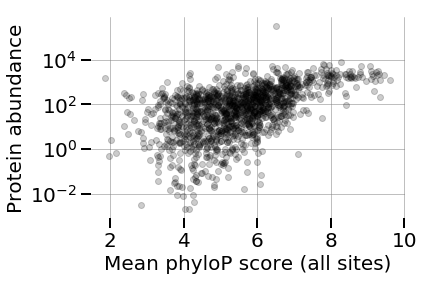

In [50]:
exp = []
score = []
for i,j in seq_dicty[base_genome].items():
    if i in expression_dict.keys():
        exp.append(expression_dict[i])
        score.append(np.mean(dicty_phylop[i][:]))
print(stats.spearmanr(score, exp))
fig, ax = plt.subplots()
ax.semilogy(score, exp, 'ko', alpha=0.2)
ax.set_ylabel('Protein abundance')
ax.set_xlabel('Mean phyloP score (all sites)')
plt.tight_layout()
plt.savefig('../Results/phylop_v_exp.png')

## Gather data / run statistical tests! Entirely irrational/impossible to justify choices here are with regard to which sequence to specifically look for, where inside of genes to look (end trimming), and which conservation scoring scheme to use (phyloP looks most stable?)

### First section here is looking for pre-defined sub-sequences. Right now I use, as an internal control, another instance of the same synonymous codon within the gene to compare evolutionary rates between synonymous positions within and outside of the pre-defined sequences

In [ ]:
# sds = []
# others = []
# # putative_sd = 'TGGA'
# # putative_sd = 'GGAG'
# # putative_sd = 'GAGG'
# # putative_sd = 'AGGA'
# # putative_sd = 'GGAA'
# # putative_sd = 'TATAAT'
# putative_sd = 'TTGACA'



# for gene_name, sequence in seq_dicty[base_genome].items():
#     ####Find SD sites
#     sd_sites = [m.start() for m in re.finditer(putative_sd, sequence)]
#     ####Continue analysis for this gene if I have at least one
#     if len(sd_sites) > 0:
#     ####Iterate through each of them separately
#         for sd_site in sd_sites:
#     ####Make sure this one is in a good location
# #             if sd_site > len(sequence)-50:
# #             if sd_site > len(sequence)-50 and gene_name in preceding_genes:
#             if sd_site < len(sequence)-50 and sd_site > 50:
#     ####First find the third codon positions then determine if it is in the 4-fold redundant class
#                 for nt_pos in range(sd_site, sd_site+len(putative_sd), 1):
#                     if nt_pos%3==2:
#                         codon = sequence[nt_pos-2:nt_pos+1]
#                         if codon_to_aa_dict[codon] in ['P', 'T', 'A', 'V', 'G'] or codon in redundant_codon_extension:
#     ####Get location of other codons that are the same
#                             codon_list = [sequence[nt:nt+3] for nt in range(0, len(sequence), 3)]
#                             codon_sites = [i*3+2 for i, x in enumerate(codon_list) if x == codon]
#                             codon_sites = [i for i in codon_sites if i != nt_pos and i > 50 and i < len(sequence) - 50]
#     ####Only continue if I was able to find matching codons as controls
#                             if len(codon_sites) > 0:
#                                 controls = [dicty_phylop[gene_name][i] for i in codon_sites]
#                                 sds.extend([dicty_phylop[gene_name][nt_pos]])
#                                 others.extend([random.choice(controls)])
#     #                                 controls = [dicty_phylopGERP[gene_name][i] for i in codon_sites]
#     #                                 sds.extend([dicty_phylopGERP[gene_name][nt_pos]])
#     #                                 others.extend([random.choice(controls)])

#     #                                 controls = [dicty_phastCons[gene_name][i] for i in codon_sites]
#     #                                 sds.extend([dicty_phastCons[gene_name][nt_pos]])
#     #                                 others.extend([random.choice(controls)])


In [ ]:
# print('Length of my data: {} and {}'.format(len(sds),len(others)))
# print('Means of each category SD ({}) and non ({})'.format(np.mean(sds), np.mean(others)))
# print('Statistical test {}'.format(stats.wilcoxon(sds, others)))

# fig, ax = plt.subplots(figsize=(8,4))
# ax.hist(np.array(sds)-np.array(others), 40, alpha=0.8);
# ax.set_xlabel('Difference\n <---SD less conserved // SD more conserved--->');
# ax.set_ylabel('counts');
# ax.axvline(0, c='r', linewidth=2)
# ax.axvline(np.mean(np.array(sds)-np.array(others)), c='c', linewidth=2)


# fig, ax = plt.subplots(figsize=(6,4))
# ax.violinplot([np.array(sds), np.array(others)], points=50, widths=0.5, showextrema=False);
# ax.set_xticklabels(['', 'SD sites', '', 'Controls'])
# ax.set_ylabel('phylop conservation score')

### Instead of choosing control codons based on the same synonymous codon, instead choose control based off of +1 and -1 flanking of synonymous codons

In [ ]:
# sds = []
# others = []
# # putative_sd = 'TGGA'
# putative_sd = 'GGAG'
# # putative_sd = 'GAGG'
# # putative_sd = 'AGGA'
# # putative_sd = 'GGAA'
# for gene_name, sequence in list(seq_dicty[base_genome].items())[:]:
#     codon_temp = [sequence[i:i+3] for i in range(0, len(sequence), 3)]
#     ####Find SD sites
#     sd_sites = [m.start() for m in re.finditer(putative_sd, sequence)]
#     ####Continue analysis for this gene if I have at least one
#     if len(sd_sites) == 0:
#         continue
#     ####Iterate through each of them separately
#     for sd_site in sd_sites:
#     ####Make sure each one is in a good location
# #         if sd_site > len(sequence)-50 and gene_name in preceding_genes:
#         if sd_site < len(sequence)-50 and sd_site > 50:
#     ####First find the third codon positions then determine if it is in the 4-fold redundant class
#             for nt_pos in range(sd_site, sd_site+len(putative_sd), 1):
#                 if nt_pos%3==2:
#                     codon = sequence[nt_pos-2:nt_pos+1]
#                     if codon_to_aa_dict[codon] in ['P', 'T', 'A', 'V', 'G'] or codon in redundant_codon_extension:
#     ####Get location of other trinucleotides that are the same
#                         control_sites = [m.start() for m in re.finditer(sequence[nt_pos-1:nt_pos+2], sequence)]
#                         control_sites = [site for site in control_sites if site+1 != nt_pos and site > 50 and site < len(sequence) - 50]
#                         control_sites = [site for site in control_sites if (site+2)%3 == 0]
#                         control_sites = [site for site in control_sites if codon_to_aa_dict[sequence[site-1:site+2]] in ['P', 'T', 'A', 'V', 'G'] or sequence[site-1:site+2] in redundant_codon_extension]
#     ####Only continue if I was able to find matching codons as controls
#                         if len(control_sites) > 0:
#                             controls = [dicty_phylop[gene_name][i+1] for i in control_sites]
#                             sds.extend([dicty_phylop[gene_name][nt_pos]])
#                             others.extend([random.choice(controls)])
#     #                                 controls = [dicty_phylopGERP[gene_name][i] for i in codon_sites]
#     #                                 sds.extend([dicty_phylopGERP[gene_name][nt_pos]])
#     #                                 others.extend([random.choice(controls)])

#     #                                 controls = [dicty_phastCons[gene_name][i] for i in codon_sites]
#     #                                 sds.extend([dicty_phastCons[gene_name][nt_pos]])
#     #                                 others.extend([random.choice(controls)])



In [ ]:
# print('Length of my data: {} and {}'.format(len(sds),len(others)))
# print('Means of each category SD ({}) and non ({})'.format(np.mean(sds), np.mean(others)))
# print('Statistical test {}'.format(stats.wilcoxon(sds, others)))

# fig, ax = plt.subplots(figsize=(8,4))
# ax.hist(np.array(sds)-np.array(others), 40, alpha=0.8);
# ax.set_xlabel('Difference\n <---SD less conserved // SD more conserved--->');
# ax.set_ylabel('counts');
# ax.axvline(0, c='r', linewidth=2)
# ax.axvline(np.mean(np.array(sds)-np.array(others)), c='c', linewidth=2)


# fig, ax = plt.subplots(figsize=(6,4))
# ax.violinplot([np.array(sds), np.array(others)], points=50, widths=0.5, showextrema=False);
# ax.set_xticklabels(['', 'SD sites', '', 'Controls'])
# ax.set_ylabel('phylop conservation score')

## I could run either of the above tests for all possible X-mers to see how the ones that I classify as SD do or don't stand out from the crowd

### As a side note: I'd like this to return a flat p-value distribution in shuffled data but I'm not sure whether it would or not

In [ ]:
# dicty_xMer = {}
# for xMer in list(itertools.product('ATGC', repeat=4))[:100]:
# # for fiveMer in [['G', 'G', 'A', 'G']]:
#     putative_sd = ''.join(xMer)
#     print(putative_sd)
#     ####Code I want to iterate through here
#     sds = []
#     others = []
#     for gene_name, sequence in list(seq_dicty[base_genome].items())[:]:
#         codon_temp = [sequence[i:i+3] for i in range(0, len(sequence), 3)]
#         ####Find SD sites
#         sd_sites = [m.start() for m in re.finditer(putative_sd, sequence)]
#         ####Continue analysis for this gene if I have at least one
#         if len(sd_sites) == 0:
#             continue
#         ####Iterate through each of them separately
#         for sd_site in sd_sites:
#         ####Make sure each one is in a good location
#     #         if sd_site > len(sequence)-50 and gene_name in preceding_genes:
#             if sd_site < len(sequence)-50 and sd_site > 50:
#         ####First find the third codon positions then determine if it is in the 4-fold redundant class
#                 for nt_pos in range(sd_site, sd_site+len(putative_sd), 1):
#                     if nt_pos%3==2:
#                         codon = sequence[nt_pos-2:nt_pos+1]
#                         if codon_to_aa_dict[codon] in ['P', 'T', 'A', 'V', 'G'] or codon in redundant_codon_extension:
#         ####Get location of other trinucleotides that are the same
#                             control_sites = [m.start() for m in re.finditer(sequence[nt_pos-1:nt_pos+2], sequence)]
#                             control_sites = [site for site in control_sites if site+1 != nt_pos and site > 50 and site < len(sequence) - 50]
#                             control_sites = [site for site in control_sites if (site+2)%3 == 0]
#                             control_sites = [site for site in control_sites if codon_to_aa_dict[sequence[site-1:site+2]] in ['P', 'T', 'A', 'V', 'G'] or sequence[site-1:site+2] in redundant_codon_extension]
#         ####Only continue if I was able to find matching codons as controls
#                             if len(control_sites) > 0:
# #                                 scrambled = list(dicty_phylop[gene_name])
# #                                 np.random.shuffle(scrambled)
# #                                 controls = [scrambled[i+1] for i in control_sites]
# #                                 sds.extend([scrambled[nt_pos]])
# #                                 others.extend([random.choice(controls)])
#                                 controls = [dicty_phylop[gene_name][i+1] for i in control_sites]
#                                 sds.extend([dicty_phylop[gene_name][nt_pos]])
#                                 others.extend([random.choice(controls)])
#     dicty_xMer[putative_sd] = stats.wilcoxon(sds, others)[1]

In [ ]:
plt.figure()
plt.hist([i for i in dicty_xMer.values() if np.isnan(i) == False], 20);
# print(sorted([(i,j) for i,j in dicty_fiveMer.items() if np.isnan(j) == False], key=lambda x: x[1]))

# What if we don't look at X-mers but instead just consider strong SD binding sequences according to various thresholds (for the SD sequence task I believe that this method is very preferable as there are fewer degress of researcher flexibility in terms of defining the sequence)

## In the first version I'm again comparing conservation of a particular 4-fold redundant position that is within a strong binding sequence to a randomly chosen identical 4-fold redundant codon elsewhere in the sequence
Note I'm currently looking at a 6nt aSD sequence and only considering 4-fold redundant codons in positions 2,3,4, or 5. I'm also taking care not to double count any one position

In [63]:
with open('../Data/json-energyRef-CCUCCU.txt') as infile:
    energy_dict = json.load(infile)
asd = 'CCTCCT'
threshold = -4.5

In [160]:
sds = []
others = []
for gene_name, seq in list(seq_dicty[base_genome].items())[:]:
    codon_list = [seq[nt:nt+3] for nt in range(0, len(seq), 3)]
    energy_list = []
    for i in range(0, len(seq)-len(asd)):
        fragment = seq[i:i+len(asd)]
        if fragment.count('-') == 0:
            energy = energy_dict[fragment.replace('T', 'U')]
            energy_list.append(energy)
        else:
            energy_list.append(np.nan)
    analyzed_positions = []
    sd_positions = [list(range(i, i+6)) for i,j in enumerate(energy_list) if j < threshold]
    sd_positions = [item for sublist in sd_positions for item in sublist]
    sd_positions = list(set(sd_positions))
    for i, energy in enumerate(energy_list):
                if energy < threshold and i > 100 and i < len(seq)-50:
#                 if energy < threshold and i > 100 and i < len(seq)-50 and gene_name in expression_subset:
#                 if energy < threshold and i > 50 and i < len(seq)-50 and gene_name in long_genes:
#                 if energy < threshold and i > len(seq)-50 and gene_name in preceding_genes:
#                 if energy < threshold and i > len(seq)-50 and gene_name not in preceding_genes:
                    if i%3 == 0:
                        modifiers = [2]
                    elif i%3 == 2:
                        modifiers = [3]
                    elif i%3 == 1:
                        modifiers = [1,4]
                    for modifier in modifiers:
                        codon = seq[i+modifier-2:i+modifier+1]
                        if codon_to_aa_dict[codon] in ['P', 'T', 'A', 'V', 'G'] or codon in redundant_codon_extension:
#                         if codon_to_aa_dict[codon] in ['F', 'H', 'Q', 'N', 'K', 'D', 'E']:
                            control_sites = [j*3+2 for j, x in enumerate(codon_list) if x == codon]
#                             control_sites = [j for j in control_sites if j != i+modifier and j > 100 and j < len(seq) - 50]
                            control_sites = [j for j in control_sites if j not in sd_positions and j > 100 and j < len(seq)-50]
                            if len(control_sites) > 0 and i+modifier not in analyzed_positions:
                                sds.append(dicty_phylop[gene_name][i+modifier])
                                others.append(dicty_phylop[gene_name][random.choice(control_sites)])
                                analyzed_positions.append(i+modifier)

Length of my data: 7264 and 7264
Means of each category SD (-0.6826313325991189) and non (-0.45502009911894276)
Medians of each category SD (-0.519) and non (-0.4025)
Statistical test WilcoxonResult(statistic=11452930.5, pvalue=3.0151401780965094e-22)
Statistical test Ttest_relResult(statistic=-10.08753235125843, pvalue=8.9912423629518024e-24)


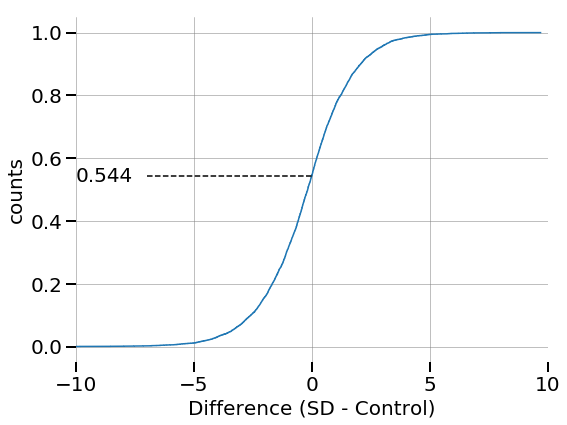

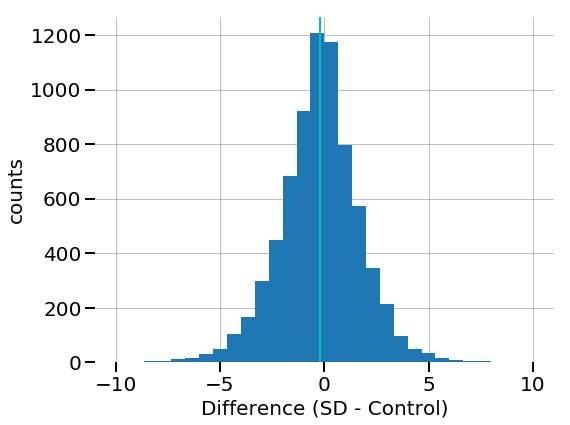

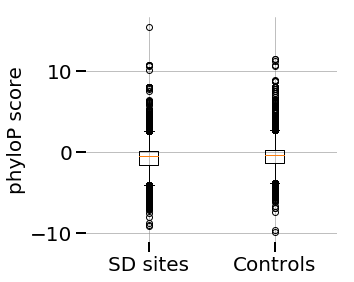

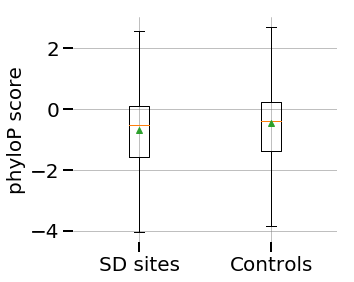

In [161]:
print('Length of my data: {} and {}'.format(len(sds),len(others)))
print('Means of each category SD ({}) and non ({})'.format(np.mean(sds), np.mean(others)))
print('Medians of each category SD ({}) and non ({})'.format(np.median(sds), np.median(others)))
print('Statistical test {}'.format(stats.wilcoxon(sds, others)))
print('Statistical test {}'.format(stats.ttest_rel(sds, others)))


diffs = np.array(sds)-np.array(others) 
hist, bins = np.histogram(diffs, bins=30, range=(-1*np.ceil(np.max(diffs)), np.ceil(np.max(diffs))))
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2
sorted_data = np.sort(diffs)
mid_val = np.shape(np.where(sorted_data < 0))[1]/sorted_data.size


fig, ax = plt.subplots(figsize=(8,6))
ax.step(sorted_data, np.arange(sorted_data.size)/sorted_data.size);  # From 0 to the number of data points-1
ax.set_xlim(-1*np.ceil(np.max(diffs)), np.ceil(np.max(diffs)))
ax.set_xlabel('Difference (SD - Control)');
ax.set_ylabel('counts');
# ax.annotate('{number:.{digits}f}'.format(number=mid_val, digits=3),
#             xy=(0, mid_val), xycoords='data',
#             xytext=(-15, 25), textcoords='offset points',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='right', verticalalignment='bottom', fontsize=20)
ax.plot((-1*np.ceil(np.max(diffs))+3, 0), (mid_val, mid_val), 'k--')
ax.annotate('{number:.{digits}f}'.format(number=mid_val, digits=3),
            xy=(-1*np.ceil(np.max(diffs)), mid_val), xycoords='data',
            xytext=(0, 0), textcoords='offset points',
            horizontalalignment='left', verticalalignment='center', fontsize=20)
plt.tight_layout()

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(center, hist, align='center', width=width)
ax.set_xlabel('Difference (SD - Control)');
ax.set_ylabel('counts');
ax.axvline(np.mean(np.array(sds)-np.array(others)), c='c', linewidth=2)
plt.tight_layout()

fig, ax = plt.subplots(figsize=(5,4))
# ax.violinplot([np.array(sds), np.array(others)], points=50, widths=0.5, showextrema=False);
# ax.set_xticklabels(['', 'SD sites', '', 'Controls'])
ax.boxplot([np.array(sds), np.array(others)], showfliers=True);
ax.set_xticklabels(['SD sites', 'Controls'])
ax.set_ylabel('phyloP score')
plt.tight_layout()

fig, ax = plt.subplots(figsize=(5,4))
# ax.violinplot([np.array(sds), np.array(others)], points=50, widths=0.5, showextrema=False);
# ax.set_xticklabels(['', 'SD sites', '', 'Controls'])
ax.boxplot([np.array(sds), np.array(others)], showmeans=True, showfliers=False);
ax.set_xticklabels(['SD sites', 'Controls'])
ax.set_ylabel('phyloP score')
plt.tight_layout()

## Repeating the above analysis using tri-nucleotide controls instead of codon level controls. I.e. find another 4-fold redundant site within the same gene that may or may not be the same codon but that has identical -1 and +1 flanking sequences

In [60]:
sds = []
others = []
for gene_name, seq in list(seq_dicty[base_genome].items())[:]:
#     print('########{}'.format(gene_name))
    codon_list = [seq[nt:nt+3] for nt in range(0, len(seq), 3)]
    energy_list = []
    for i in range(0, len(seq)-len(asd)):
        fragment = seq[i:i+len(asd)]
        if fragment.count('-') == 0:
            energy = energy_dict[fragment.replace('T', 'U')]
            energy_list.append(energy)
        else:
            energy_list.append(np.nan)
    sd_positions = [list(range(i, i+6)) for i,j in enumerate(energy_list) if j < threshold]
    sd_positions = [item for sublist in sd_positions for item in sublist]
    sd_positions = list(set(sd_positions))
    analyzed_positions = []
    for i, energy in enumerate(energy_list):
        if energy < threshold and i > 100 and i < len(seq)-50:
#         if energy < threshold and i > 50 and i < len(seq)-50 and gene_name in high_expression:
#         if energy < threshold and i > 50 and i < len(seq)-50 and gene_name in long_genes:
#         if energy < threshold and i > len(seq)-50 and gene_name in preceding_genes:
#         if energy < threshold and i > len(seq)-50 and gene_name not in preceding_genes:
            if i%3 == 0:
                modifiers = [2]
            elif i%3 == 2:
                modifiers = [3]
            elif i%3 == 1:
                modifiers = [1,4]
            for modifier in modifiers:
                codon = seq[i+modifier-2:i+modifier+1]
#                 print('Codon I am analyzing: {}'.format(codon))
                tri_nt = seq[i+modifier-1:i+modifier+2]
                if codon_to_aa_dict[codon] in ['P', 'T', 'A', 'V', 'G'] or codon in redundant_codon_extension:
                    control_sites = [m.start() for m in re.finditer(tri_nt, seq)]
                    control_sites = [site for site in control_sites if site+1 != i+modifier and site > 100 and site < len(seq) - 50]
                    control_sites = [site for site in control_sites if (site+2)%3 == 0]
                    control_sites = [site for site in control_sites if codon_to_aa_dict[seq[site-1:site+2]] in ['P', 'T', 'A', 'V', 'G'] or seq[site-1:site+2] in redundant_codon_extension]
                    control_sites = [site for site in control_sites if site+1 not in sd_positions]
                    if len(control_sites) > 0 and i+modifier not in analyzed_positions:
#                         print('Original: {}'.format(seq[i+modifier-1:i+modifier+2]))
#                         print('Original: {}'.format(seq[i+modifier]))
#                         print('Control: {}'.format([seq[site+1] for site in control_sites]))
                        controls = [dicty_phylop[gene_name][site+1] for site in control_sites]
                        sds.append(dicty_phylop[gene_name][i+modifier])
                        others.append(random.choice(controls))
                        analyzed_positions.append(i+modifier)


Length of my data: 6347 and 6347
Means of each category SD (-0.6137595714510793) and non (-0.1741358121947377)
Medians of each category SD (-0.465) and non (-0.233)
Statistical test WilcoxonResult(statistic=7911616.5, pvalue=4.1248879507633535e-49)


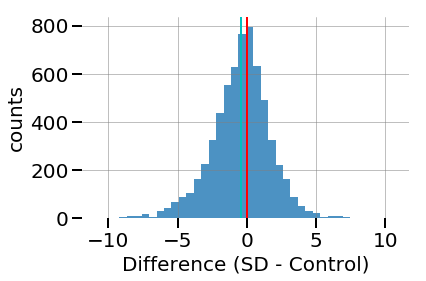

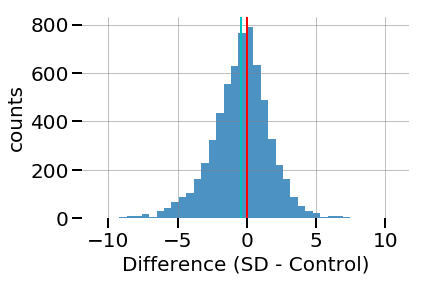

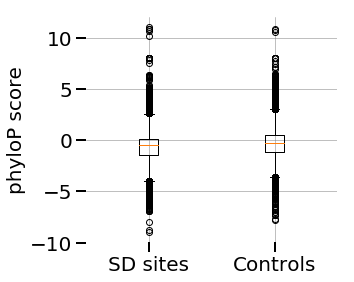

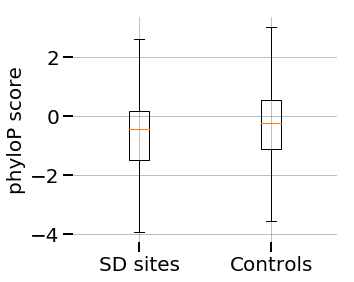

In [61]:
print('Length of my data: {} and {}'.format(len(sds),len(others)))
print('Means of each category SD ({}) and non ({})'.format(np.mean(sds), np.mean(others)))
print('Medians of each category SD ({}) and non ({})'.format(np.median(sds), np.median(others)))
print('Statistical test {}'.format(stats.wilcoxon(sds, others)))

fig, ax = plt.subplots(figsize=(6,4))
ax.hist(np.array(sds)-np.array(others), 40, alpha=0.8);
ax.set_xlabel('Difference (SD - Control)');
ax.set_ylabel('counts');
ax.axvline(0, c='r', linewidth=2)
ax.axvline(np.mean(np.array(sds)-np.array(others)), c='c', linewidth=2)
plt.tight_layout()

fig, ax = plt.subplots(figsize=(6,4))
ax.hist([i for i in np.array(sds)-np.array(others) if i != 0], 40, alpha=0.8);
ax.set_xlabel('Difference (SD - Control)');
ax.set_ylabel('counts');
ax.axvline(0, c='r', linewidth=2)
ax.axvline(np.mean(np.array(sds)-np.array(others)), c='c', linewidth=2)
plt.tight_layout()

fig, ax = plt.subplots(figsize=(5,4))
# ax.violinplot([np.array(sds), np.array(others)], points=50, widths=0.5, showextrema=False);
# ax.set_xticklabels(['', 'SD sites', '', 'Controls'])
ax.boxplot([np.array(sds), np.array(others)], showfliers=True);
ax.set_xticklabels(['SD sites', 'Controls'])
ax.set_ylabel('phyloP score')
plt.tight_layout()

fig, ax = plt.subplots(figsize=(5,4))
# ax.violinplot([np.array(sds), np.array(others)], points=50, widths=0.5, showextrema=False);
# ax.set_xticklabels(['', 'SD sites', '', 'Controls'])
ax.boxplot([np.array(sds), np.array(others)], showfliers=False);
ax.set_xticklabels(['SD sites', 'Controls'])
ax.set_ylabel('phyloP score')
plt.tight_layout()

# Negative control data

In [ ]:
def shuffle_gene_synonymous(gene_sequence_codons, aa_to_codons_dict, codon_to_aa_dict):
    shuffled_sequence_codons = []
    temp_dict = {}
    for aa in aa_to_codons_dict:
        temp_dict[aa] = []
    temp_dict['-'] = []
    codon_to_aa_dict['---'] = '-'
    aa_to_codons_dict['-'] = '---'
    for codon in gene_sequence_codons:
        if codon not in ['TAA', 'TAG', 'TGA']:
            temp_dict[codon_to_aa_dict[codon]].append(codon)
    for aa, synon_codons in temp_dict.items():
        np.random.shuffle(synon_codons)
    for codon in gene_sequence_codons:
        if codon not in ['TAA', 'TAG', 'TGA']:
            shuffled_sequence_codons.append(temp_dict[codon_to_aa_dict[codon]].pop(0))
    return shuffled_sequence_codons

# def shuffle_gene_complete(gene_sequence_codons):
    
#     return shuffled_sequence_codons

aa_to_codons_dict, codon_to_aa_dict = get_codon_dicts()

In [ ]:
with open('../json-energyRef-CCUCCU.txt') as infile:
    energy_dict = json.load(infile)
asd = 'CCTCCT'
threshold = -4.5

sds = []
others = []
for gene_name, seq in list(seq_dicty[base_genome].items())[:]:
    codon_list = [seq[nt:nt+3] for nt in range(0, len(seq), 3)]
#     temp_codon_list = codon_list[15:-1]
#     np.random.shuffle(temp_codon_list)
#     codon_list = codon_list[:15] + temp_codon_list + [codon_list[-1]]
#     seq = ''.join(codon_list)
#     temp_codon_list = shuffle_gene_synonymous(codon_list[15:-1], aa_to_codons_dict, codon_to_aa_dict) 
#     new_codon_list = codon_list[:15] + temp_codon_list + [codon_list[-1]]
#     codon_list = new_codon_list
#     seq = ''.join(codon_list)
    energy_list = []
    for i in range(0, len(seq)-len(asd)):
        fragment = seq[i:i+len(asd)]
        if fragment.count('-') == 0:
            energy = energy_dict[fragment.replace('T', 'U')]
            energy_list.append(energy)
        else:
            energy_list.append(np.nan)
    analyzed_positions = []
    for i in range(150, 160):
        if len(energy_list) > 200:
#     for i, energy in enumerate(energy_list):
#                 if energy < threshold and i > 50 and i < len(seq)-50:
#                 if energy < threshold and i < 50:
#                 if energy < threshold and i > 50 and i < len(seq)-50 and gene_name in high_expression:
#                 if energy < threshold and i > 50 and i < len(seq)-50 and gene_name in long_genes:
#                 if energy < threshold and i > len(seq)-50 and gene_name in preceding_genes:
                    if i%3 == 0:
                        modifiers = [2]
                    elif i%3 == 2:
                        modifiers = [3]
                    elif i%3 == 1:
                        modifiers = [1,4]
                    for modifier in modifiers:
                        codon = seq[i+modifier-2:i+modifier+1]
                        if codon_to_aa_dict[codon] in ['P', 'T', 'A', 'V', 'G'] or codon in redundant_codon_extension:
                            control_sites = [j*3+2 for j, x in enumerate(codon_list) if x == codon]
                            control_sites = [j for j in control_sites if j != i+modifier and j > 50 and j < len(seq) - 50]
                            if len(control_sites) > 0 and i+modifier not in analyzed_positions:
                                sds.append(dicty_phylop[gene_name][i+modifier])
                                others.append(dicty_phylop[gene_name][random.choice(control_sites)])
                                analyzed_positions.append(i+modifier)

In [ ]:
print('Length of my data: {} and {}'.format(len(sds),len(others)))
print('Means of each category SD ({}) and non ({})'.format(np.mean(sds), np.mean(others)))
print('Statistical test {}'.format(stats.wilcoxon(sds, others)))

fig, ax = plt.subplots(figsize=(8,4))
ax.hist(np.array(sds)-np.array(others), 40, alpha=0.8);
ax.set_xlabel('Difference\n <---SD less conserved // SD more conserved--->');
ax.set_ylabel('counts');
ax.axvline(0, c='r', linewidth=2)
ax.axvline(np.mean(np.array(sds)-np.array(others)), c='c', linewidth=2)


fig, ax = plt.subplots(figsize=(6,4))
ax.violinplot([np.array(sds), np.array(others)], points=50, widths=0.5, showextrema=False);
ax.set_xticklabels(['', 'SD sites', '', 'Controls'])
ax.set_ylabel('phylop conservation score')

# What now/next?

### Each of the above analyses can be repeated by all manner of gene stratification. I.e. only looking at short/long genes, high/low expression genes, etc.

### I'm not entirely satisfied with the p-value null distributions and think better p-values to report might be to compute z-scores for a sequence by getting a summary statistic for all genes and then computing the same summary statistic using a synonymous codon shuffling scheme. Or rather even if this wasn't my ultimate statistic I should still be able to show a flat p-value distribution using my method when I do that

# Scratch. 

## Currently investigating (re-investigating) protein domains problem

In [ ]:
# df.columns

In [ ]:
df = pd.read_csv('../Data/foldingFromPNAS_v2.csv')
df['bNumber'] = ''
df['patricNumber'] = ''
print(len(df.index))

for index in df.index:
    names = df.loc[index]['Gene names'].split(' ')
    for name in names:
        if name in reference_name_dict.keys():
            df.set_value(index, 'bNumber', name)
            try:
                df.set_value(index, 'patricNumber', reference_name_dict[name])
            except KeyError:
                pass


df = df[df['patricNumber'] != '']

print(len(df.index))

# Choose whether to stratify the data according to Lm

In [ ]:
# df = df[df['Lm (residues)'].isnull() == False]
df = df[(df['Lm (residues)'] > 0) & (df['Lm (residues)'] <= 50)]

### Anywayyy, domain_dict will specify what I want to actually consider when I do the analysis following according to the same way I laid out above

In [ ]:
df['Domain_beg_nt'] = int()
df['Domain_end_nt'] = int()
for index in df.index:
    domain_beg, domain_end = df.loc[index]['Codon range of domain'].split('-')
    df.set_value(index, 'Domain_beg_nt', int(domain_beg)*3)
    df.set_value(index, 'Domain_end_nt', int(domain_end)*3)

    
df['Domain_beg_in_patric'] = int()
df['Domain_end_in_patric'] = int()
for index in df.index:    
    ref_seq_beg = ref_genome_seq_ref_dict[df.loc[index]['bNumber']][int(df.loc[index]['Domain_beg_nt']):int(df.loc[index]['Domain_beg_nt'])+100]
    ref_seq_end = ref_genome_seq_ref_dict[df.loc[index]['bNumber']][int(df.loc[index]['Domain_end_nt'])-100:int(df.loc[index]['Domain_end_nt'])]
    df.set_value(index, 'Domain_beg_in_patric', ref_genome_seq_patric_dict[df.loc[index]['patricNumber']].find(ref_seq_beg))
    df.set_value(index, 'Domain_end_in_patric', ref_genome_seq_patric_dict[df.loc[index]['patricNumber']].find(ref_seq_end) + 100)


domain_dicts = {}
for index in df.index:
    try:
        domain_dicts[df.loc[index]['patricNumber']].append(df.loc[index]['Domain_end_in_patric'])
    except:
        domain_dicts[df.loc[index]['patricNumber']] = [df.loc[index]['Domain_end_in_patric']]
        
for i,j in domain_dicts.items():
    tempy = []
    for loc in j:
#         tempy.extend(list(range(loc+60, loc+150))) #####IMPORTANT
        tempy.extend(list(range(loc-150, loc))) #####IMPORTANT
    domain_dicts[i] = tempy

In [ ]:
print(len(domain_dicts.keys()))

In [ ]:
with open('../Data/json-energyRef-CCUCCU.txt') as infile:
    energy_dict = json.load(infile)
asd = 'CCTCCT'
threshold = -4.5

sds = []
others = []
for gene_name, seq in list(seq_dicty[base_genome].items())[:]:
    if gene_name not in domain_dicts:
        continue
    codon_list = [seq[nt:nt+3] for nt in range(0, len(seq), 3)]
    energy_list = []
    for i in range(0, len(seq)-len(asd)):
        fragment = seq[i:i+len(asd)]
        if fragment.count('-') == 0:
            energy = energy_dict[fragment.replace('T', 'U')]
            energy_list.append(energy)
        else:
            energy_list.append(np.nan)
    analyzed_positions = []
    sd_positions = [list(range(i, i+6)) for i,j in enumerate(energy_list) if j < threshold]
    sd_positions = [item for sublist in sd_positions for item in sublist]
    sd_positions = list(set(sd_positions))
    for i, energy in enumerate(energy_list):
        if i in domain_dicts[gene_name]:
                if energy < threshold and i > 100 and i < len(seq)-50:
#                 if energy < threshold and i > 100 and i < len(seq)-50 and gene_name in expression_subset:
#                 if energy < threshold and i > 50 and i < len(seq)-50 and gene_name in long_genes:
#                 if energy < threshold and i > len(seq)-50 and gene_name in preceding_genes:
#                 if energy < threshold and i > len(seq)-50 and gene_name not in preceding_genes:
                    if i%3 == 0:
                        modifiers = [2]
                    elif i%3 == 2:
                        modifiers = [3]
                    elif i%3 == 1:
                        modifiers = [1,4]
                    for modifier in modifiers:
                        codon = seq[i+modifier-2:i+modifier+1]
                        if codon_to_aa_dict[codon] in ['P', 'T', 'A', 'V', 'G'] or codon in redundant_codon_extension:
#                         if codon_to_aa_dict[codon] in ['F', 'H', 'Q', 'N', 'K', 'D', 'E']:
                            control_sites = [j*3+2 for j, x in enumerate(codon_list) if x == codon]
#                             control_sites = [j for j in control_sites if j != i+modifier and j > 100 and j < len(seq) - 50]
                            control_sites = [j for j in control_sites if j not in sd_positions and j > 100 and j < len(seq)-50]
                            if len(control_sites) > 0 and i+modifier not in analyzed_positions:
                                sds.append(dicty_phylop[gene_name][i+modifier])
                                others.append(dicty_phylop[gene_name][random.choice(control_sites)])
                                analyzed_positions.append(i+modifier)

In [ ]:
print('Length of my data: {} and {}'.format(len(sds),len(others)))
print('Means of each category SD ({}) and non ({})'.format(np.mean(sds), np.mean(others)))
print('Statistical test {}'.format(stats.wilcoxon(sds, others)))

fig, ax = plt.subplots(figsize=(8,4))
ax.hist(np.array(sds)-np.array(others), 40, alpha=0.8);
ax.set_xlabel('Difference\n <---SD less conserved // SD more conserved--->');
ax.set_ylabel('counts');
ax.axvline(0, c='r', linewidth=2)
ax.axvline(np.mean(np.array(sds)-np.array(others)), c='c', linewidth=2)


fig, ax = plt.subplots(figsize=(6,4))
ax.violinplot([np.array(sds), np.array(others)], points=50, widths=0.5, showextrema=False);
ax.set_xticklabels(['', 'SD sites', '', 'Controls'])
ax.set_ylabel('phylop conservation score')

# Re-investigate that whole hypothesis whereby SD sites were (maybe?) enriched after domain ends

In [ ]:
matrix_total = []
# for index in df.index:
# for index in df[df['Lm (residues)'].isnull() == False].index:
# for index in df[(df['Lm (residues)'] > 0)].index:
for index in df[(df['Lm (residues)'] > 5) & (df['Lm (residues)'] < 30)].index:
    domain_beg, domain_end = df.loc[index]['Codon range of domain'].split('-')
    domain_beg = int(domain_beg)*3
    domain_end = int(domain_end)*3
    if domain_end-domain_beg > 105 and domain_end < len(ref_genome_seq_ref_dict[df.loc[index]['bNumber']]) - 100:
        total_seq = str(ref_genome_seq_ref_dict[df.loc[index]['bNumber']][domain_end-100:domain_end+100]).replace('T', 'U')
        matrix_total.append([energy_dict[total_seq[i:i+6]] for i in range(0, len(total_seq)-6)])

In [ ]:
print(np.shape(matrix_total))
plt.figure(figsize=(12,4))
plt.plot(np.mean(matrix_total, axis=0))
plt.axvline(100, c='r', linestyle='--', linewidth=4)

In [ ]:
exp = []
variable = []
for gene_name in list(expression_dict.keys())[:]:
    if gene_name in seq_dicty[base_genome].keys():
        seq = seq_dicty[base_genome][gene_name]
        exp.append(expression_dict[gene_name])
        tempy = []
        codons = [seq[i:i+3] for i in range(0, len(seq), 3)]
        for i,codon in enumerate(codons):
            if codon not in ['TAA', 'TGA', 'TAG', '---']:
                if codon_to_aa_dict[codon] in ['P', 'T', 'A', 'V', 'G'] or codon in redundant_codon_extension:
                    tempy.append(dicty_phylop[gene_name][(i*3)+2])
#         variable.append(np.mean(tempy))
#         variable.append(np.mean(dicty_phylop[gene_name]))
        variable.append(np.mean([dicty_phylop[gene_name][i] for i in range(1, len(dicty_phylop[gene_name]), 3)]))


print(stats.spearmanr(variable, exp))

In [ ]:
plt.figure()
plt.semilogy(variable, exp, 'ko', alpha=0.1)